In [331]:
import pysm3
import pysm3.units as u
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from funzioni import get_pixel_value_norm
from funzioni import polarizzazione 
from funzioni import allpixel_norm
from astropy import units as u


In [332]:
import warnings
warnings.filterwarnings("ignore")

In [333]:
#costants

k = 1.38e-23
h = 6.626e-34
T=20
c=10e8
nu_I_D=545
nu_I_S=0.408
nu_P_D=353
nu_P_S=23
beta_D=1.54
beta_S=-3

In [334]:
#parameters
frequencies = np.array([40,50,60,68,78,89,100,119,140,166,195,235,280,337,402])
pixels = np.array([1,1000,5000])
Stokes = np.array([0,1,2])
ref= ([nu_I_D,nu_I_S,nu_P_D,nu_P_S])

In [335]:
Sky_D=pysm3.Sky(nside=64, preset_strings=["d0"])

In [336]:
Sky_S=pysm3.Sky(nside=64, preset_strings=["s0"])

In [337]:
#Intensity 
I_D = np.zeros([len(frequencies),len(pixels)])
for i,pix_i in enumerate(pixels):    
    I_D[:,i]= get_pixel_value_norm (frequencies,ref_frequencies=ref[0], npix=pix_i, St=Stokes[0], sky=Sky_D)

In [338]:

I_S = np.zeros([len(frequencies),len(pixels)])
for i,pix_i in enumerate(pixels):    
    I_S[:,i]= get_pixel_value_norm (frequencies,ref_frequencies=ref[1], npix=pix_i, St=Stokes[0], sky=Sky_S)

In [339]:
#Q
Q_D = np.zeros([len(frequencies),len(pixels)])
for i,pix_i in enumerate(pixels):    
    Q_D[:,i]= get_pixel_value_norm (frequencies,ref_frequencies=ref[2], npix=pix_i, St=Stokes[1], sky=Sky_D)

In [340]:
Q_S = np.zeros([len(frequencies),len(pixels)])
for i,pix_i in enumerate(pixels):    
    Q_S[:,i]= get_pixel_value_norm (frequencies,ref_frequencies=ref[3], npix=pix_i, St=Stokes[1], sky=Sky_S)

In [341]:
#U
U_D = np.zeros([len(frequencies),len(pixels)])
for i,pix_i in enumerate(pixels):    
    U_D[:,i]= get_pixel_value_norm (frequencies,ref_frequencies=ref[2], npix=pix_i, St=Stokes[2], sky=Sky_D)

In [342]:
U_S = np.zeros([len(frequencies),len(pixels)])
for i,pix_i in enumerate(pixels):    
    U_S[:,i]= get_pixel_value_norm (frequencies,ref_frequencies=ref[3], npix=pix_i, St=Stokes[2], sky=Sky_S)

In [343]:
#Root mean square
map_D_I = Sky_D.get_emission(nu_I_D * u.GHz)[0] 
RMS_D_I = np.sqrt(np.mean(map_D_I.value**2))

map_D_Q = Sky_D.get_emission(nu_P_D * u.GHz)[1] 
RMS_D_Q = np.sqrt(np.mean(map_D_Q.value**2))

map_D_U = Sky_D.get_emission(nu_P_D * u.GHz)[2] 
RMS_D_U = np.sqrt(np.mean(map_D_U.value**2))


In [344]:
map_S_I = Sky_S.get_emission(nu_I_S * u.GHz)[0] 
RMS_S_I = np.sqrt(np.mean(map_S_I.value**2))

map_S_Q = Sky_S.get_emission(nu_P_S * u.GHz)[1]
RMS_S_Q = np.sqrt(np.mean(map_S_Q.value**2))

map_S_U = Sky_S.get_emission(nu_P_S * u.GHz)[2]
RMS_S_U = np.sqrt(np.mean(map_S_U.value**2))


In [345]:
#values for all the pixels of the map
allpixel_D, err_D = np.array(allpixel_norm(frequencies,St=Stokes[0],sky=Sky_D,value=RMS_D_I))
allpixel_S, err_S = np.array(allpixel_norm(frequencies,St=Stokes[0],sky=Sky_S,value=RMS_S_I))

In [346]:
#reference function for the model d0 and s0
modified_BB_I_D=(np.exp((h*nu_I_D*10**9)/(k*T))-1)/(np.exp((h*frequencies*10**9)/(k*T))-1)*(frequencies/nu_I_D)**(1+beta_D)
power_law_I_S=((frequencies/nu_I_S)**(beta_S))
modified_BB_Q_D=(np.exp((h*nu_P_D*10**9)/(k*T))-1)/(np.exp((h*frequencies*10**9)/(k*T))-1)*(frequencies/nu_P_D)**(1+beta_D)
power_law_Q_S=((frequencies/nu_P_S)**(beta_S))


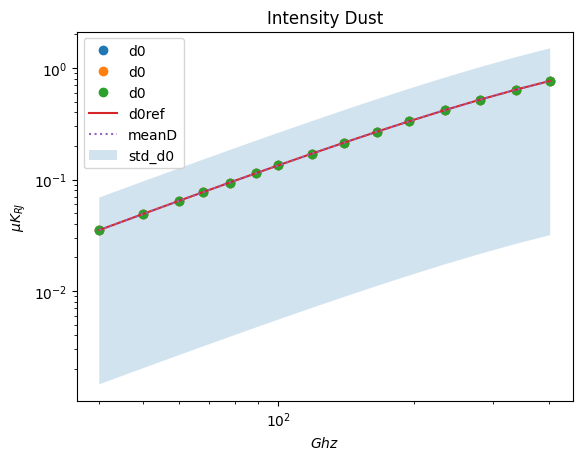

In [347]:
for i,pix_i in enumerate(pixels):
        plt.plot(frequencies,I_D[:,i],'o',label="d0")

plt.plot(frequencies,modified_BB_I_D,'-',label="d0ref")
plt.plot(frequencies,allpixel_D,':',label="meanD")
plt.fill_between(frequencies,allpixel_D+err_D, allpixel_D-err_D, alpha=0.2, label="std_d0")



plt.title("Intensity Dust")
plt.yscale('log')
plt.xscale('log')
plt.xlabel(r'$Ghz$')
plt.ylabel(r'$\mu$$K_{RJ}$')
plt.legend()

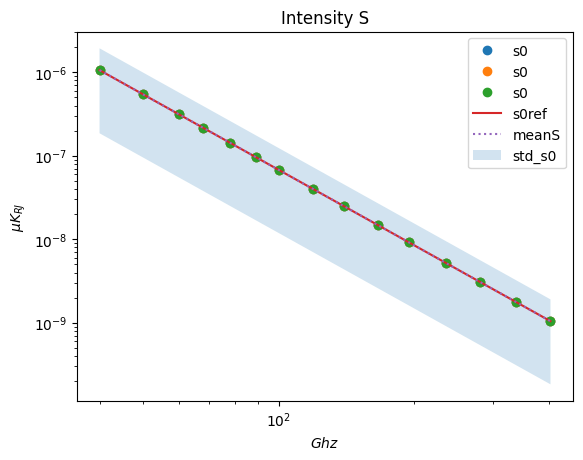

In [348]:
for i,pix_i in enumerate(pixels):
        plt.plot(frequencies,I_S[:,i],'o',label="s0")

plt.plot(frequencies,power_law_I_S,'-',label="s0ref")
plt.plot(frequencies,allpixel_S,':',label="meanS")
plt.fill_between(frequencies,allpixel_S+err_S, allpixel_S-err_S, alpha=0.2, label="std_s0")


plt.title("Intensity S")
plt.yscale('log')
plt.xscale('log')
plt.xlabel(r'$Ghz$')
plt.ylabel(r'$\mu$$K_{RJ}$')
plt.legend()

In [349]:

allpixel_Q_D, err_Q_D = allpixel_norm (frequencies,St=Stokes[1],sky=Sky_D,value=RMS_D_Q)
allpixel_Q_S, err_Q_S= allpixel_norm (frequencies,St=Stokes[1],sky=Sky_S,value=RMS_S_Q)


allpixel_U_D, err_U_D = allpixel_norm (frequencies,St=Stokes[2],sky=Sky_D,value=RMS_D_U)
allpixel_U_S, err_U_S= allpixel_norm (frequencies,St=Stokes[2],sky=Sky_S,value=RMS_S_U)


In [350]:
allpixel_Q_D_arr=np.asarray(allpixel_Q_D)
allpixel_Q_S_arr=np.asarray(allpixel_Q_S)
err_Q_D_arr=np.asarray(err_Q_D)
err_Q_S_arr=np.asarray(err_Q_S)

In [351]:
allpixel_U_D_arr=np.asarray(allpixel_U_D)
allpixel_U_S_arr=np.asarray(allpixel_U_S)
err_U_D_arr=np.asarray(err_U_D)
err_U_S_arr=np.asarray(err_U_S)

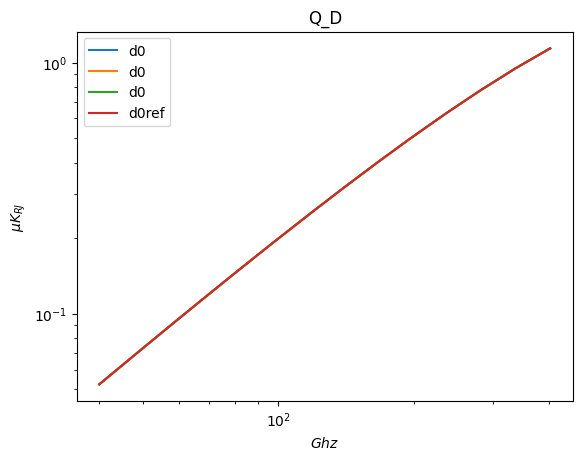

In [352]:
for i,pix_i in enumerate(pixels):
        plt.plot(frequencies,Q_D[:,i],'-',label="d0")

plt.plot(frequencies,modified_BB_Q_D,'-',label="d0ref")


plt.title("Q_D")
plt.yscale('log')
plt.xscale('log')
plt.xlabel(r'$Ghz$')
plt.ylabel(r'$\mu$$K_{RJ}$')
plt.legend()





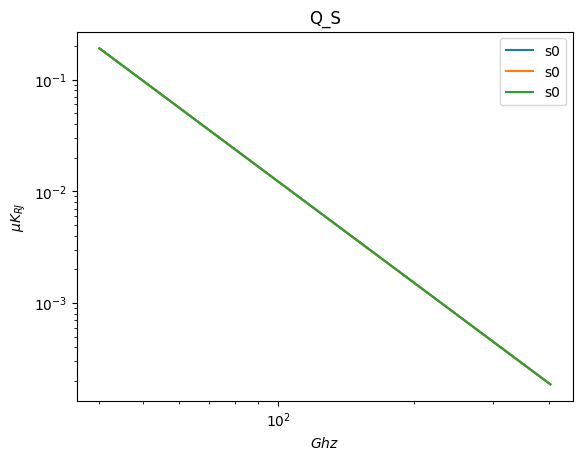

In [353]:
for i,pix_i in enumerate(pixels):
    plt.plot(frequencies,Q_S[:,i],'-',label="s0")

plt.title("Q_S")
plt.yscale('log')
plt.xscale('log')
plt.xlabel(r'$Ghz$')
plt.ylabel(r'$\mu$$K_{RJ}$')
plt.legend()

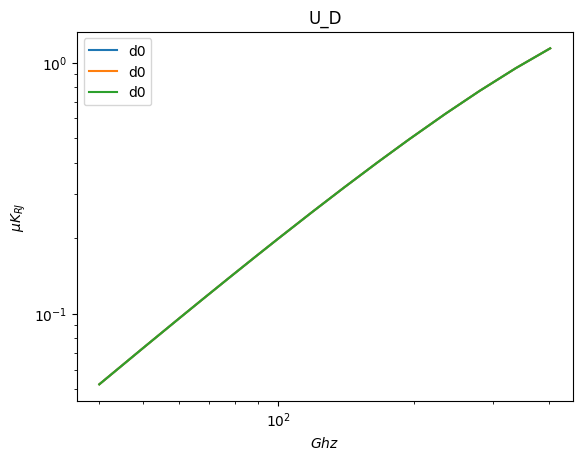

In [354]:
for i,pix_i in enumerate(pixels):
        plt.plot(frequencies,U_D[:,i],'-',label="d0")


plt.title("U_D")
plt.yscale('log')
plt.xscale('log')
plt.xlabel(r'$Ghz$')
plt.ylabel(r'$\mu$$K_{RJ}$')
plt.legend()

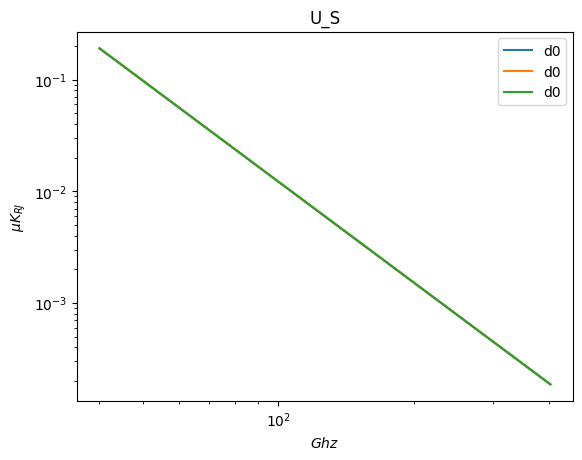

In [355]:
for i,pix_i in enumerate(pixels):
        plt.plot(frequencies,U_S[:,i],'-',label="d0")

plt.title("U_S")
plt.yscale('log')
plt.xscale('log')
plt.xlabel(r'$Ghz$')
plt.ylabel(r'$\mu$$K_{RJ}$')
plt.legend()

In [356]:
P_D=polarizzazione(Q_D,U_D)
modified_BB_P_D=polarizzazione(modified_BB_Q_D,modified_BB_Q_D)

allpixel_P_D=polarizzazione(allpixel_Q_D,allpixel_U_D)
err_P_D=polarizzazione(err_Q_D,err_U_D)

In [357]:
P_S=polarizzazione(Q_S,U_S)
power_law_P_S= polarizzazione(power_law_Q_S,power_law_Q_S)

allpixel_P_S=polarizzazione(allpixel_Q_S,allpixel_U_S)
err_P_S=polarizzazione(err_Q_S,err_U_S)



In [358]:
allpixel_P_D=np.asarray(allpixel_P_D)
allpixel_P_S=np.asarray(allpixel_P_S)
err_P_D=np.asarray(err_P_D)
err_P_S=np.asarray(err_P_S)

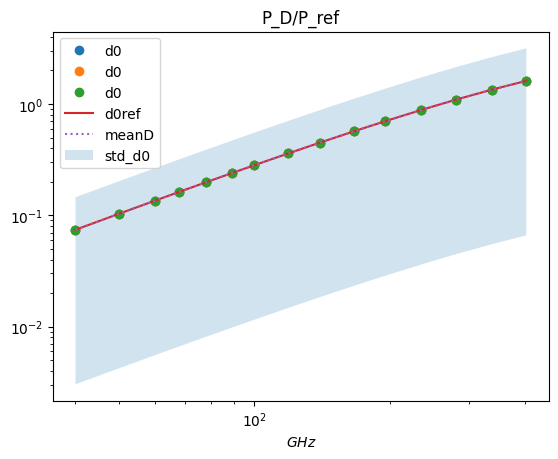

In [359]:

plt.plot(frequencies,P_D,'o',label="d0")
plt.plot(frequencies,modified_BB_P_D,'-',label="d0ref")
plt.plot(frequencies,allpixel_P_D,':',label="meanD")
plt.fill_between(frequencies, allpixel_P_D+err_P_D, allpixel_P_D-err_P_D, alpha=0.2, label="std_d0")



plt.title("P_D/P_ref")
plt.yscale('log')
plt.xscale('log')
plt.xlabel(r'$GHz$')
plt.legend()






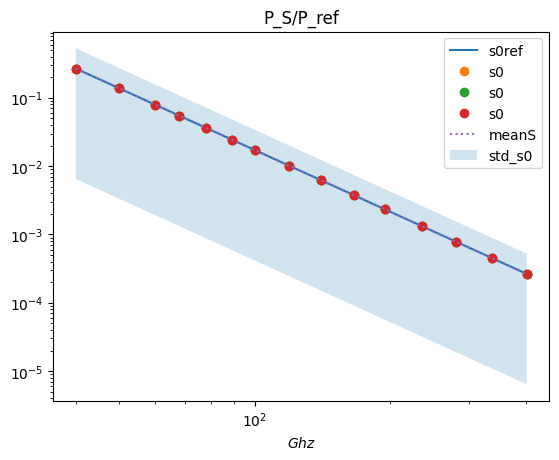

In [360]:

plt.plot(frequencies,power_law_P_S,'-',label="s0ref")
plt.plot(frequencies,P_S,'o',label="s0")
plt.plot(frequencies,allpixel_P_S,':',label="meanS")
plt.fill_between(frequencies, allpixel_P_S+err_P_S, allpixel_P_S-err_P_S, alpha=0.2, label="std_s0")



plt.title("P_S/P_ref")
plt.yscale('log')
plt.xscale('log')
plt.xlabel(r'$Ghz$')
plt.legend()